In [74]:
import video
import importlib
importlib.reload(video)


<module 'video' from '/Users/asif/progs/02-uni/05-advanced-proj-wang/custom-yolo/video.py'>

In [75]:
values = [(2, 1),
          (2, 2),
          ]

In [76]:
video_yolo = video.VideoYOLO("yolov8n.pt", "trimmed.mp4", "out.mp4", past_frame_len=5, prediction_frame_len=1, show=False, debug=False)
video_yolo.start()
print(video_yolo.eval())

0: 384x640 3 persons, 1 car, 1 potted plant, 64.0ms
Speed: 2.9ms preprocess, 64.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 3 persons, 1 car, 1 potted plant, 61.9ms
Speed: 1.8ms preprocess, 61.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 4 persons, 1 car, 1 potted plant, 57.8ms
Speed: 1.7ms preprocess, 57.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 4 persons, 1 car, 1 potted plant, 60.6ms
Speed: 1.6ms preprocess, 60.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 4 persons, 1 car, 1 potted plant, 56.7ms
Speed: 1.8ms preprocess, 56.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 4 persons, 1 car, 1 potted plant, 65.6ms
Speed: 1.8ms preprocess, 65.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 5 persons, 1 car, 1 potted plant, 61.8ms
Speed: 1.4ms preprocess, 61.8ms inference, 1.0ms postp

In [112]:
# Define the maximum value
max_value = 10

# Generate array of tuples with all combinations of x and y until max_value
combinations = [(x, y) for x in range(1, max_value + 1, 2) for y in range(1, max_value // 2 + 1, 2)]

# Print the array of tuples
print("Combinations of tuples", ":")
print(combinations)
print(len(combinations))

Combinations of tuples :
[(1, 1), (1, 3), (1, 5), (3, 1), (3, 3), (3, 5), (5, 1), (5, 3), (5, 5), (7, 1), (7, 3), (7, 5), (9, 1), (9, 3), (9, 5)]
15


In [113]:
mse_dict = {}
for (x,y) in combinations:
    print(x, y)
    video_yolo = video.VideoYOLO("yolov8n.pt", "trimmed.mp4", "out.mp4", past_frame_len=x, prediction_frame_len=y, show=False, debug=False)
    video_yolo.start()
    mse_dict[(x,y)] = video_yolo.eval()

1 1
0: 384x640 3 persons, 1 car, 1 potted plant, 71.7ms
Speed: 2.3ms preprocess, 71.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 3 persons, 1 car, 1 potted plant, 60.7ms
Speed: 1.6ms preprocess, 60.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 4 persons, 1 car, 1 potted plant, 59.8ms
Speed: 1.6ms preprocess, 59.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 4 persons, 1 car, 1 potted plant, 57.9ms
Speed: 2.5ms preprocess, 57.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 4 persons, 1 car, 1 potted plant, 58.8ms
Speed: 1.7ms preprocess, 58.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 4 persons, 1 car, 1 potted plant, 62.3ms
Speed: 1.5ms preprocess, 62.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 5 persons, 1 car, 1 potted plant, 54.5ms
Speed: 1.4ms preprocess, 54.5ms inference, 0.5ms p

In [114]:

print(mse_dict)

{(1, 1): 1060.8781148875696, (1, 3): 1015.8274488256988, (1, 5): 974.179252871227, (3, 1): 1238.551189470362, (3, 3): 5354.872840029256, (3, 5): 15131.786602897255, (5, 1): 1652.1708318052445, (5, 3): 4836.659209060718, (5, 5): 10641.288169815116, (7, 1): 2240.135709648193, (7, 3): 4454.346135125263, (7, 5): 9227.424044429259, (9, 1): 2463.8037385941, (9, 3): 4094.6375860108806, (9, 5): 7691.319376517765}


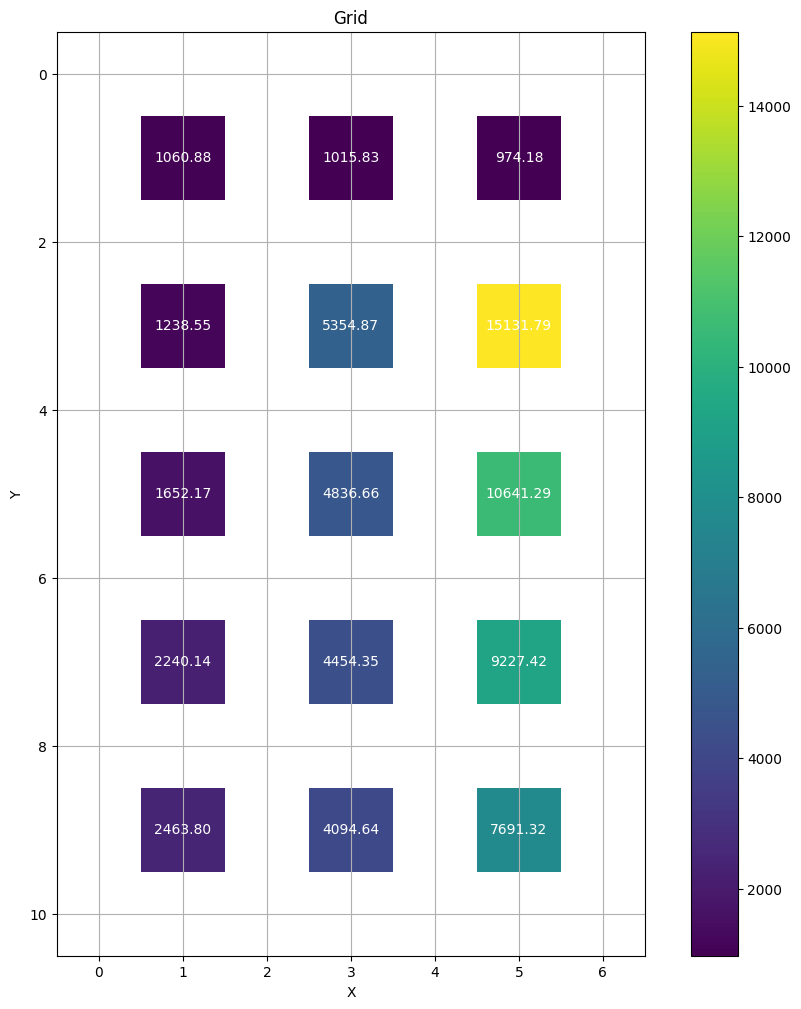

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Get current datetime
now = datetime.now()

# Format the datetime string
formatted_datetime = now.strftime("%Y-%m-%d-%H-%M-%S")
# Print the formatted datetime
rows = list(mse_dict.keys())[-1][0] + 2
cols = list(mse_dict.keys())[-1][1] + 2

grid_values = mse_dict

array_values = np.zeros((rows, cols))
for coord, value in grid_values.items():
  array_values[coord[0], coord[1]] = value

array_values[array_values == 0] = np.nan
# Plot the grid
plt.figure(figsize=(12,12))
plt.imshow(array_values, cmap='viridis', interpolation='nearest')

for i in range(rows):
    for j in range(cols):
        if not np.isnan(array_values[i, j]):
            plt.text(j, i, f'{array_values[i, j]:.2f}', ha='center', va='center', color='white')



plt.colorbar()
plt.title('Grid')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(visible=True)
plt.savefig(f"imgs/grid/{formatted_datetime}")
plt.show()
